# Edunet Foundation


# NeuralNet class for regression 


# I. Overview

Objective of the assignment is to use NeuralNet class for regression and implement on my Regression data. Other task is to implement 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy.Data selected for this assignment is "Housing data of King county, USA". Below is overview of the approach i have followed in completing the assignment.

1) Visualizing and Analyzing the data

2) Preprocessing the data

2) NeuralNet class for regression 

3) Cross validation to find optimum neural network parameters

4) Plots for results.

5) Analyzing prediction results and model analysis

6) Conclusion

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

## Description

Data selected for this Assignment is "Housing data of King county, USA". It has 21 columns(house features) and 21613 observations. This dataset contains house sale prices of King county. It includes data of houses which are sold within period May 2014 - May 2015.

Description about the house features present in dataset:

id - Unique ID/Notation of house,

date - Date house was sold,

price - Target variable,

bedrooms - No of bedrooms in house,

bathrooms - No of bathrooms in house,

sqft_living - square footage of the home,

sqft_lot - square footage of the lot,

floors - No of floors in house,

waterfront - House which has a view to a waterfront,

view - Has been viewed,

condition - How good the condition is ( Overall ),

grade - Overall grade given to the housing unit, based on King County grading system,

sqft_above - square footage of house apart from basement,

sqft_basement - square footage of the basement,

yr_built - Built Year,

yr_renovated - Year when house was renovated,

zipcode - zip,

lat - Latitude coordinate,

long - Longitude coordinate,

sqft_living15 - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area,

sqft_lot15 - lotsize area in 2015(implies-- some renovations).

## Plots to visualize data

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
# Reading data using pandas library
house_data=pd.read_csv('C:/Users/rampa/Downloads/archive (1)/kc_house_data.csv')

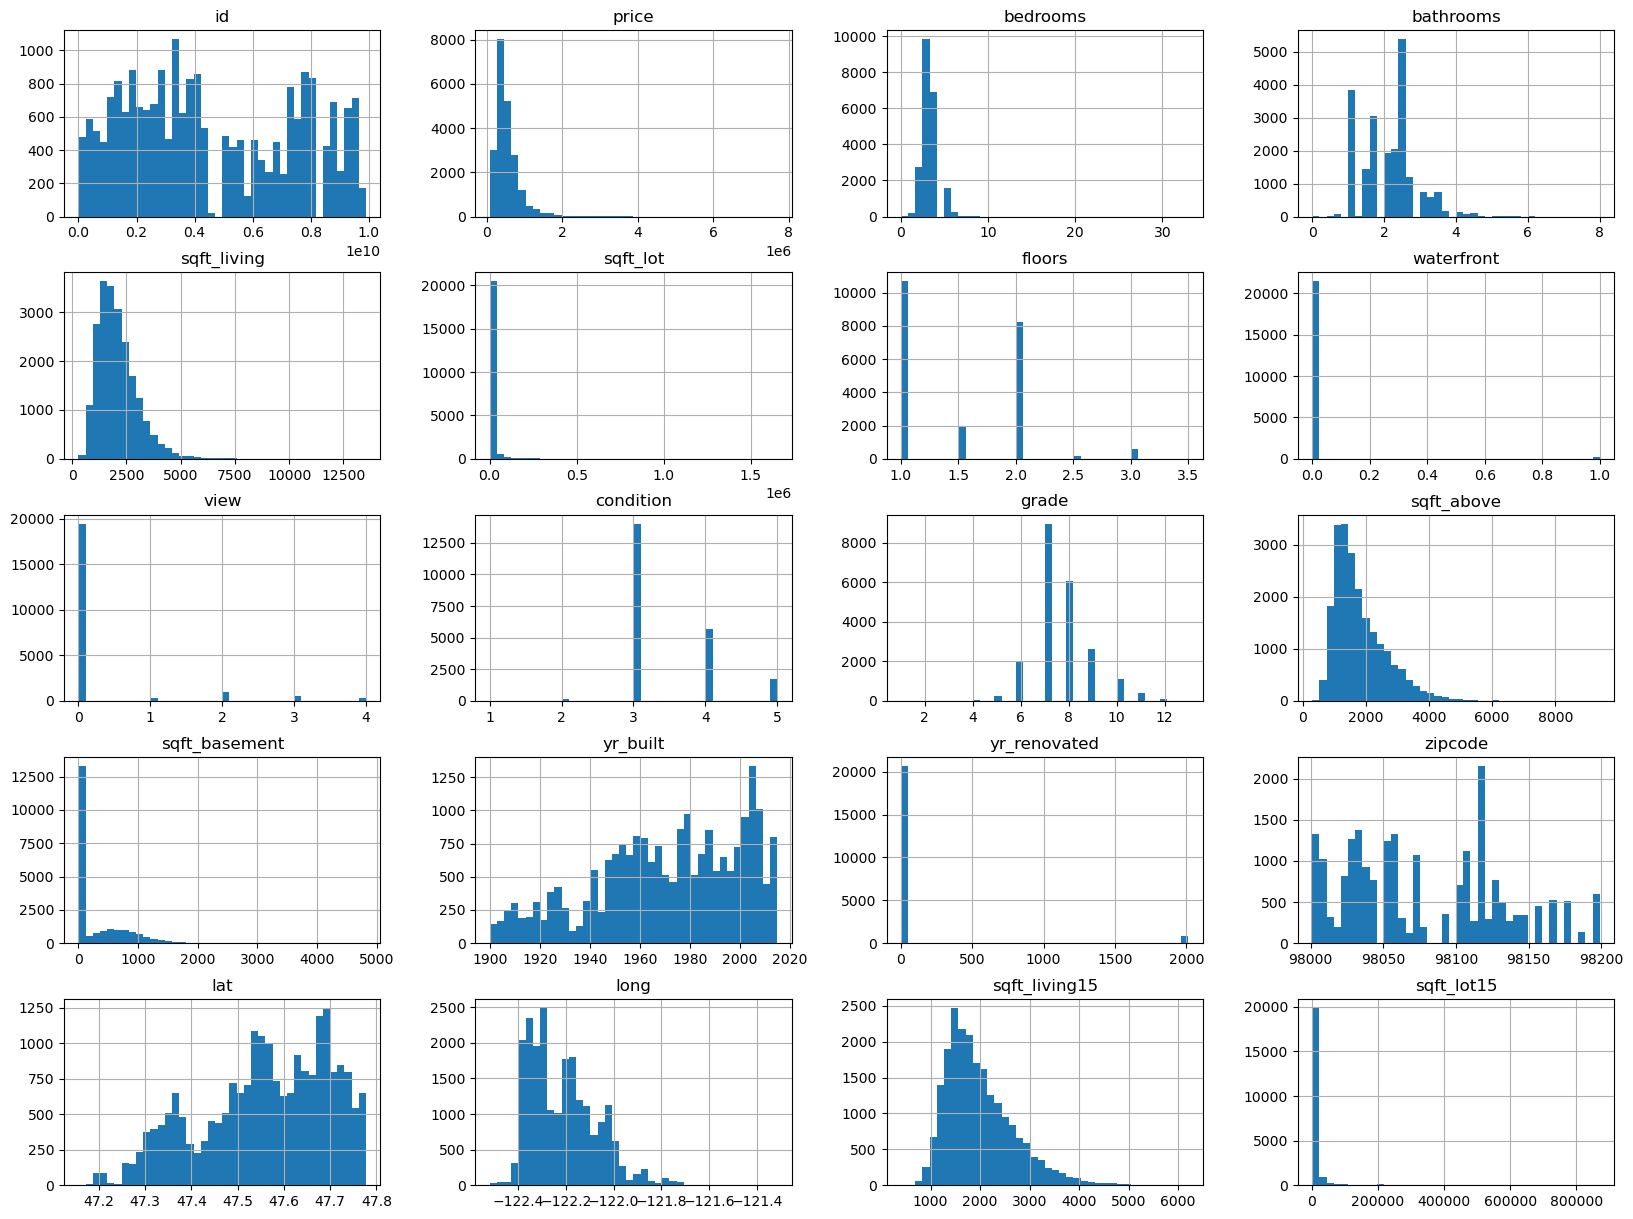

In [4]:
# Overall idea about distribution of data
house_data.hist(bins=40, figsize=(20,15))
plt.show()

<Axes: xlabel='bedrooms', ylabel='count'>

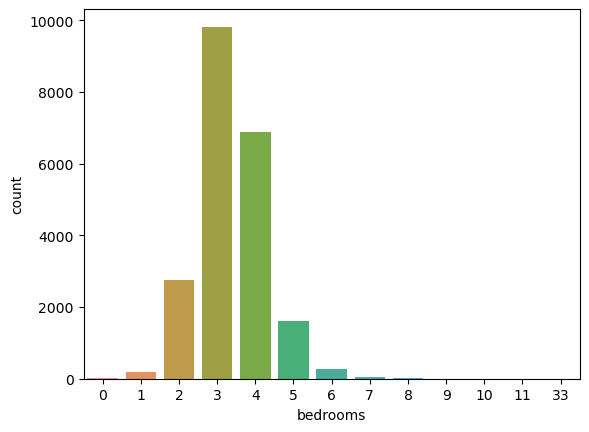

In [5]:
# Count plot of Bedrooms 
sns.countplot(x='bedrooms',data=house_data)

Above plot indicates that houses with 3 bedrooms are most common in King county while houses with 1,7 bedrooms are very uncommon

Text(87.59722222222221, 0.5, 'Longitude')

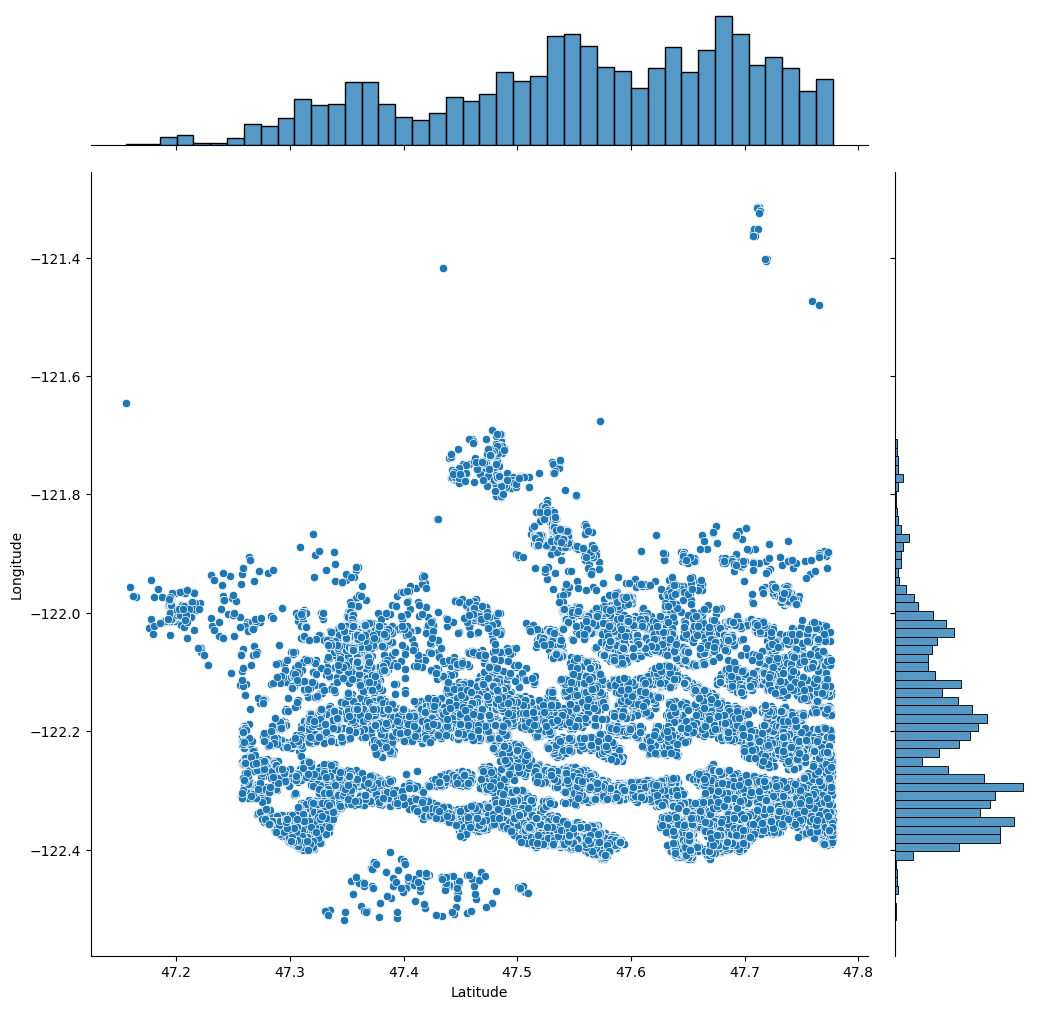

In [6]:
# Joint plot between Latitude on x axis and Longitude on y axis
sns.jointplot(x=house_data.lat.values,y=house_data.long.values,height=10)
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Longitude",fontsize=10)

Above plot indicates houses are more dense within latititude 47.7 to 47.8 and longitude 122.2 to -122.4

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

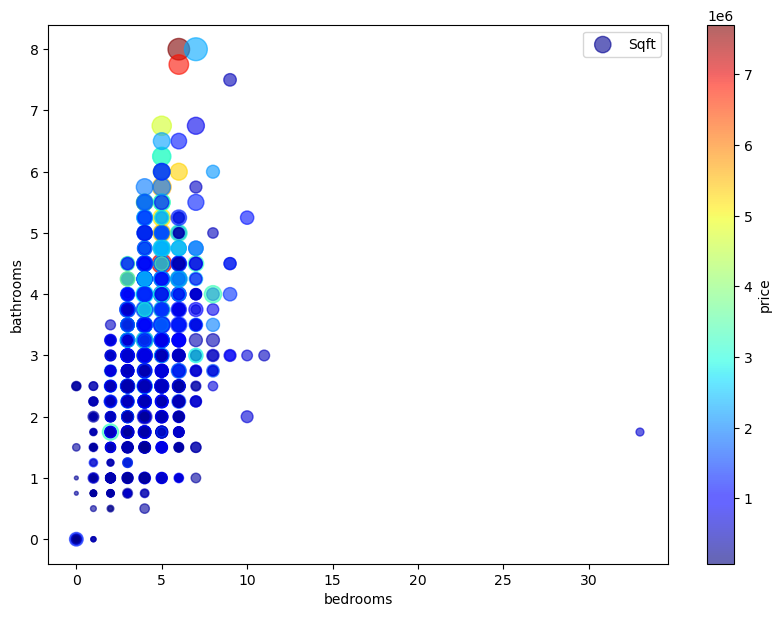

In [7]:
# Scatter plot between bedrooms on x axis and bathrooms on y axis, sqft of living area as size of scatter points, color as price.
fig, ax = plt.subplots()
house_data.plot(kind="scatter",x='bedrooms',y='bathrooms',s=house_data['sqft_living']/50, label="Sqft",alpha=0.6, figsize=(10,7),c="price", cmap=plt.get_cmap("jet"), colorbar=True,ax=ax)

From above plot we can summarise that price of the house is increasing as no of bathrooms, bedrooms increases. As the sqft of living area increases no of bathrooms also increased.

In [8]:
# Jointplot between sqft of living area on x axis and price on y axis
sns.jointplot("sqft_living","price",data=house_data,kind='reg')

TypeError: jointplot() got multiple values for argument 'data'

Above plot tells that price is directly proportional to sqft of living area with most of the houses built with living area of 500 to 5000 sqft.

C:\Users\rampa\AppData\Local\Temp\ipykernel_11688\2500444469.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = house_data.corr()


<Axes: >

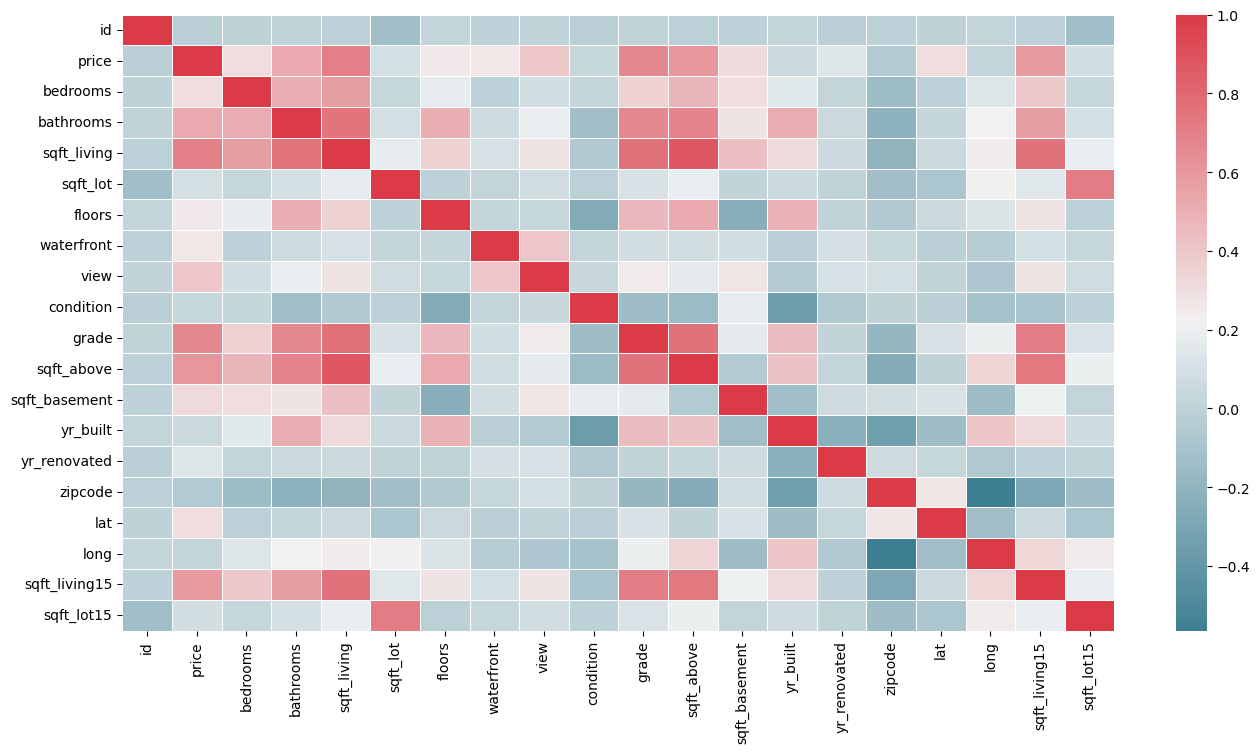

In [9]:
#Correlation heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = house_data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cmap,linewidths=.5)

From the above correlation map we can see that price of the house is positively correlated to sqft living, sqft above, grade of house, waterfront, floors, bathrooms, bedrooms and negetively correlated to age of house, condition of house. From correlation plot it is surprising to see that year built and no of bathrooms, bedrooms are positively correlated to some extent.

<Axes: xlabel='long', ylabel='price'>

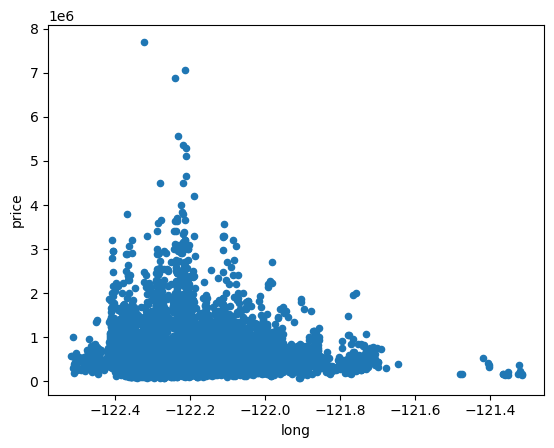

In [10]:
# Scatter plot between Longitude on x axis and price on y axis
house_data.plot(kind='scatter',x="long",y="price")

From above scatter plot we can identify that houses within longitude range -122.1 to -122.4 are more expensive, -121.5 to -121.3 are least expensive.

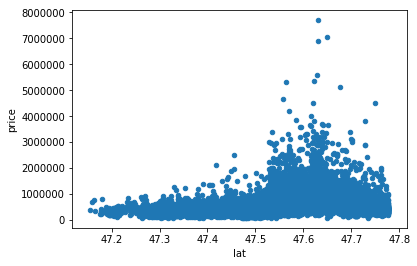

In [10]:
# Scatter plot between latitude on x axis and price on y axis
house_data.plot(kind='scatter',x="lat",y="price")

From above scatter plot we can identify that houses within latitude range 47.5 to 47.75 are expensive, 47.1 to 47.3 are least expensive.

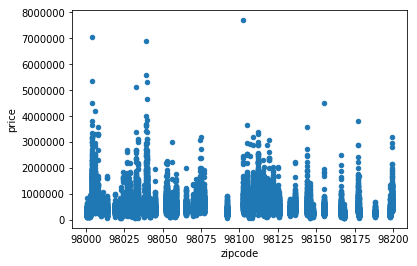

In [11]:
# Scatter plot between zipcode on x axis and price on y axis
house_data.plot(kind='scatter',x='zipcode',y='price')

Above scatter plot tells that houses are more expensive within zipcode range 98000 to 98010 and 98030 to 98040.

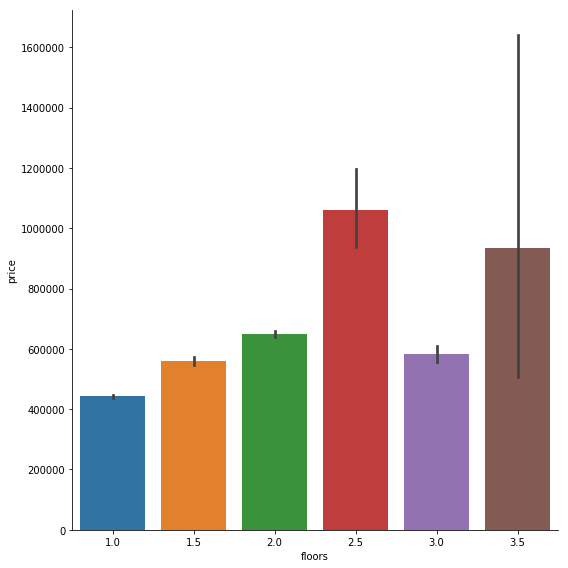

In [12]:
# Catplot between floors on x axis and price on y axis
sns.catplot(data=house_data, x="floors", y="price",height=8,kind='bar')

Above cat plot indicates that on an avg prices of the houses with 2.5 floors are expensive, with 1 floor are least expensive compared to others.

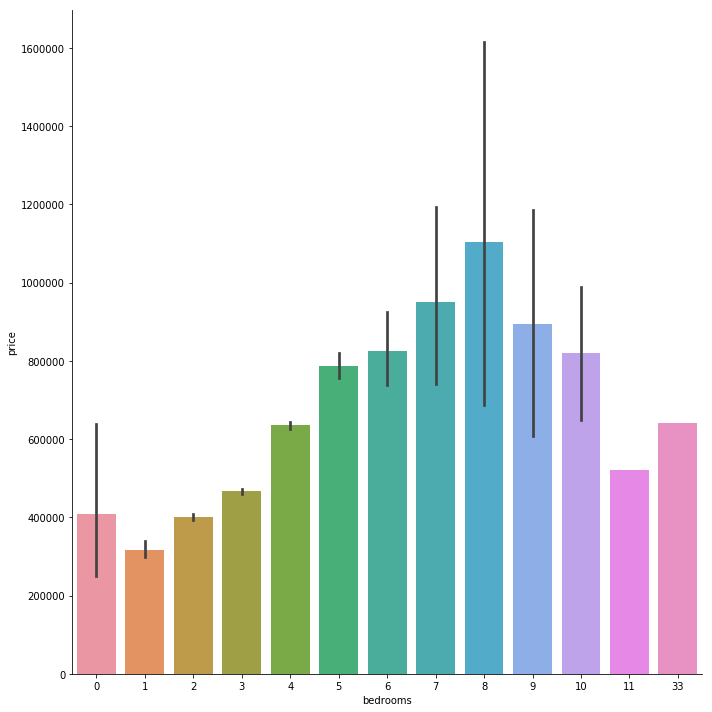

In [13]:
# Catplot between bedrooms on x axis and price on y axis
sns.catplot(data=house_data, x="bedrooms", y="price",height=10,kind='bar')

Above catplot indicates that on an avg prices of houses with 8 bedrooms are expensive compared to others.

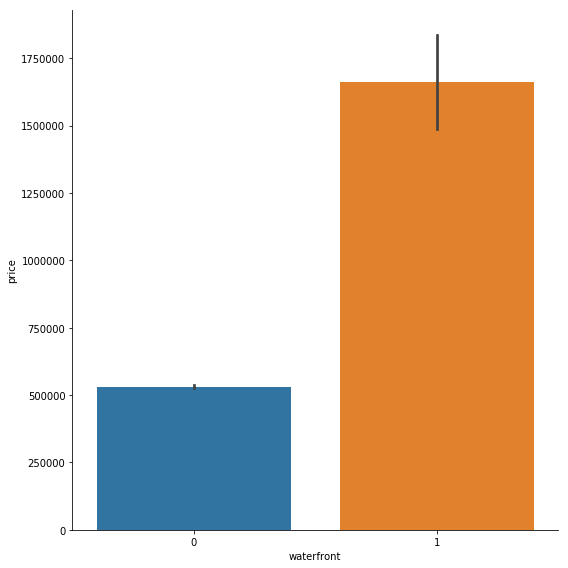

In [14]:
# Catplot between waterfront on x axis and price on y axis
sns.catplot(data=house_data, x="waterfront", y="price",height=8,kind='bar')

Above catplot indicates that houses with waterfront are very expensive compared to no waterfront.

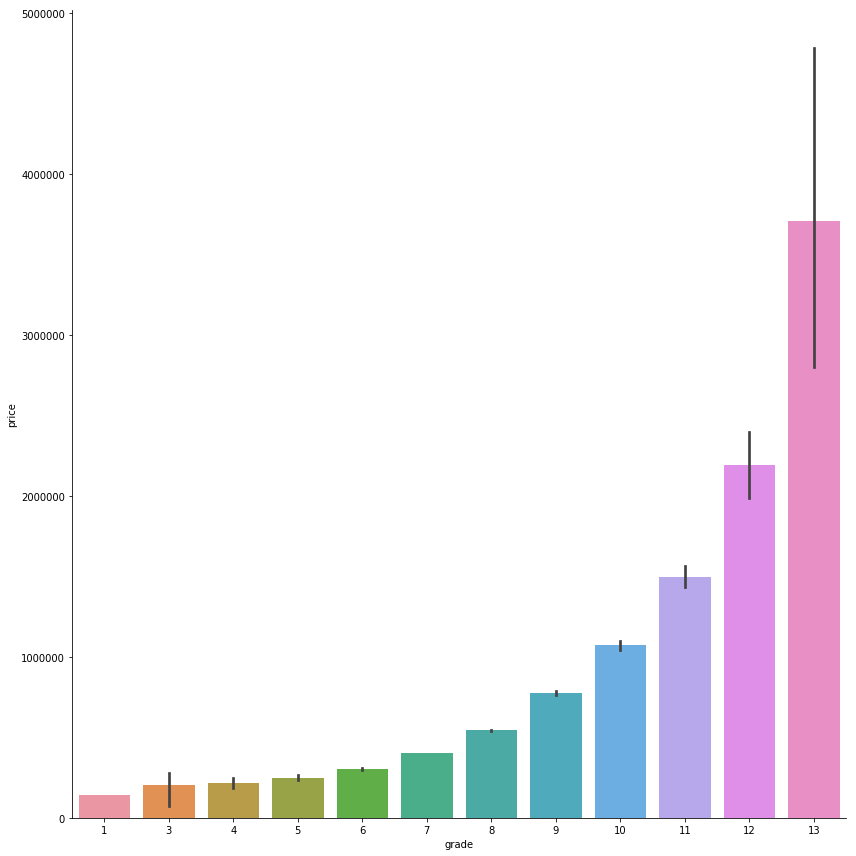

In [15]:
# Catplot between grade on x axis and price on y axis
sns.catplot(data=house_data, x="grade", y="price",height=12,kind='bar')

Above catplot indicates that price of the house is increasing exponentially as the grade of house increases.

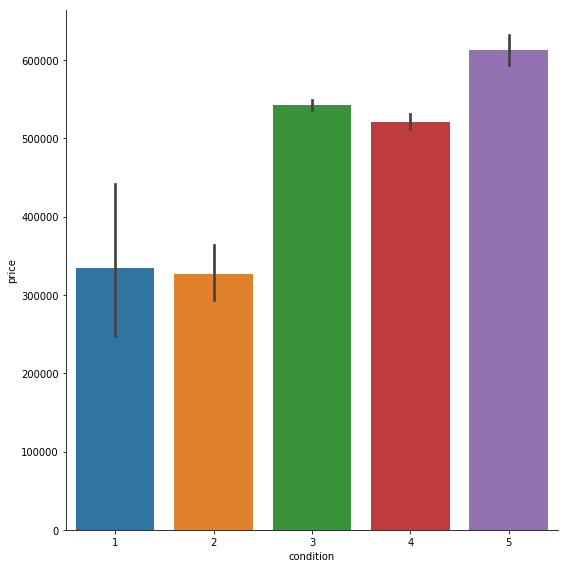

In [16]:
# Catplot between condition on x axis and price on y axis
sns.catplot(data=house_data, x="condition", y="price",height=8,kind='bar')

Above catplot indicates that price is more for the houses with good condition.

## Reading and Analyzing the plots

Based on the visualizations these are the observations identified. Number of houses with 3 bedrooms are more common in King county with number of houses with 4 bedrooms taking second place and number of houses with 7 bedrooms are very uncommon. Houses are more dense within latititude 47.7 to 47.8 and longitude 122.2 to -122.4. Price of the houses are increasing as no of bathrooms, bedrooms increases. As the sqft of living area increases no of bathrooms also increased. Price of house is directly proportional to sqft of living area with most of the houses have living area of 500 to 5000 sqft. From correlation map we can see that price of the house is positively correlated to sqft living, sqft above, grade of house, waterfront, floors, bathrooms, bedrooms and negetively correlated to age of house, condition of house. From correlation plot it is surprising to see that year built and no of bathrooms, bedrooms are positively correlated to some extent. Houses within longitude range -122.1 to -122.4 are more expensive, -121.5 to -121.3 are least expensive and houses within latitude range 47.5 to 47.75 are expensive, 47.1 to 47.3 are least expensive. It is seen that houses are more expensive within zipcode range 98000 to 98010 and 98030 to 98040. On an avg prices of the houses with 2.5 floors are expensive while houses with 1 floor are least expensive compared to others. On an avg prices of houses with 8 bedrooms are expensive compared to others. Houses with waterfront are very expensive compared to no waterfront. Price of the house is increasing exponentially as the grade of house increases and price is more for the houses with good condition.

## Preprocessing of the data

In [17]:
# function to drop the rows that has null or missing values
house_data=house_data.dropna()

In [18]:
# Data is already clean and has no missing values
house_data.shape

(21613, 21)

In [19]:
#Dropping unwanted columns
house_data=house_data.drop(['id','date'],axis=1)
house_data.shape

(21613, 19)

In [20]:
# Seperating target variable
t=pd.DataFrame(house_data.iloc[:,0])
house_data=house_data.drop(['price'],axis=1)
t

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
5,1225000.0
6,257500.0
7,291850.0
8,229500.0
9,323000.0


In [21]:
house_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# III. Methods

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes. 
- Explain and use 5-fold cross validation to find a good neural network parameters including the structure and report the test accuracy. 

## Summary of Neural Networks

Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions, we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation. 

It contains an input layer, an output layer and hidden layer. Input layer consists of nodes that are the features of the dataset whereas the output layer nodes are the classes to which the entry belongs to i.e the output after classification. 

Inputs are fed into the network through input layer and the outputs are calculated and returned through output layers. This process is called forward propagation. These computed values are compared with actual values and the weights are updated based on the errors. This process is called Backward propagation. Activation functions are used to bring non linear properties to the network. Activation functions make comples non linear functional mappings between inputs and outputs.



## NeuralNet class for regression

In [22]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [23]:
""" Neural Network 
        referenced NN code by Chuck Anderson in R and C++ 

                                by Jake Lee (lemin)

    example usage:
        X = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
        T = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

        nn = nnet.NeuralNet([2,3,2])
        nn.train(X,T, wprecision=1e-20, fprecision=1e-2)
        Y = nn.use(X)

"""
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y


## Explanation of codes


There are two classes defined above. One is Standardizer class and other is Neural Net class. The Standardizer class normalizes all the values and the NeuralNet class builds the neural network that learns the data through feed forward and back propagation. 

This function takes the the number of inputs, hidden units, and outputs as the three parameters. 

The set_hunit function is used to either update or initiate the weights.It takes the weight as the parameter.

The Pack function packs the multiple weights of each layer into one vector. The unpack function does vice versa.

Forward pass in neural network propagates as shown below:

$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W 
\end{align}
$$

Activation function is used to make the network non linear. We may use tanh or RBG or etc.

In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass.

$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$

The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda.

The optimtarget function tries to reduce the error by using the object function and updates the weights accordingly.

The use method is applied to the test data after training the model. Testing data is passed as parameter and it stadardizes the data. Then forward is applied on the data which returns the predictions. 

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

## Crossvalidation

In [25]:

def split(s, num):
    avg = len(s) / float(num)
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

finalAcclist=[]
bestParamlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X, 5)
    partitionedT = split(T, 5)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        records=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            rmselist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(Xtrain, Ttrain)
                pred = model.use(Xval)
                
                valAcc = np.sqrt(mean_squared_error(Tval, pred))
                rmselist.append(valAcc)
                paramlist.append(param)
            print(rmselist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #records.append(avg)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            records.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
            
        #print(rmselist)
        print(records)
        print(params)
        bestParam = params[np.argmin(records)]
        print(bestParam)
        bestModel = NeuralNet(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        finalPred = bestModel.use(Xtest)
        finalAcc = np.sqrt(mean_squared_error(Ttest, finalPred))
        finalAcclist.append(finalAcc)
        bestParamlist.append(bestParam)

    return finalAcclist,bestParamlist

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
models = [[18,3,1],[18,7,1],[18,10,1], [18,13,1], [18,25,1]]

bestAccuracy,bestParam = cross_validate(np.array(house_data), np.array(t), models)


test 0
val 0
val 1
[160706.90235356, 144984.26584030464, 147277.92243317992, 142182.48343408486, 157490.24371021855]
[[18, 3, 1], [18, 7, 1], [18, 10, 1], [18, 13, 1], [18, 25, 1]]
142182.48343408486
[18, 13, 1]
val 2
[134214.74367263247, 123824.06306178833, 125465.37069786599, 139042.97998760064, 141422.15596664953]
[[18, 3, 1], [18, 7, 1], [18, 10, 1], [18, 13, 1], [18, 25, 1]]
123824.06306178833
[18, 7, 1]
val 3
[154315.58560159025, 141884.01040073426, 153709.89052361995, 138286.14691791977, 161145.82457869448]
[[18, 3, 1], [18, 7, 1], [18, 10, 1], [18, 13, 1], [18, 25, 1]]
138286.14691791977
[18, 13, 1]
val 4
[184264.03427837015, 143910.52655309203, 148568.4242142933, 150078.3115946729, 162297.34137057533]
[[18, 3, 1], [18, 7, 1], [18, 10, 1], [18, 13, 1], [18, 25, 1]]
143910.52655309203
[18, 7, 1]
[142182.48343408486, 123824.06306178833, 138286.14691791977, 143910.52655309203]
[[18, 13, 1], [18, 7, 1], [18, 13, 1], [18, 7, 1]]
[18, 7, 1]
test 1
val 0
[154585.56913623228, 112182.90

In [27]:
print(bestAccuracy,bestParam)

[159440.97903815433, 152669.41960917672, 135466.9019286264, 152780.6905174133, 146802.76467198966] [[18, 7, 1], [18, 25, 1], [18, 25, 1], [18, 25, 1], [18, 25, 1]]


## Crossvalidation codes and Explanation

### def split(s, num)
This function is used to divide the data into partions. It takes input data which need to be partitioned and the number of partitions that need to be done.

### cross_validate(X, T, parameters):
This crossvalidate function takes samples(X), target values(T), model parameters as input. This function returns bestAccuracy list and bestParameters list. This function first divides data into 5 partitions using split() function. 
These partitions are stored into partionedX, partionedT. 

Now for loop is written which runs through 5 different test sets(5 fold validation) where remaining data is used as training set. Now inside for loop Xtest and YTest are declared using partitionedX[test], partitionedT[test] where test is each loop.

Now remaining data is used for validation. For each validation partition among the rest partitions we choose the rest partitions into a training set. For each validation partition we are going to select all the portions that is not test and train the model. 

In each validation loop we are training data with our different parameters passed and evaluating on validation data. Each parameter returns rmse value and this is appended to rmse list, parameters respective to that rmse are appended into params list. Now after each validation we are selecting the parameter that produced minimum rmse value and storing the results into records, params. From this records list  we are picking one  with best results. Now I retrain the model with the best parameter p in P and applied the model to test set. This test accuracy is appended to finalAcclist and parameters are appended to bestParamlist. This operation runs for 5 folds and cross validate function returns finalAcclist(Best Accuracies of each test) and bestParamlist(Best parameters of each test).

From this results we choose the parameters that is repeated more number of times in bestParamlist.

# IV - Results

- Presents the results of comparison of the tested models.
- Visualize the results 
- Discuss about the choice of parameters for each model 
- What do you think about the results? 

In [28]:
from sklearn import model_selection
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(house_data),np.array(t),test_size=0.30,random_state=40)

In [29]:
nn=NeuralNet([18,25,1])
nn.train(X_train,y_train,niter=1000)

{'w': array([ 7.17153153e-01,  9.15336353e-01,  2.04221270e+00, -8.51177816e-01,
         6.23974066e-01, -5.00108249e-01,  1.12329945e+00, -4.23880100e+00,
        -1.10474148e+00, -3.61228703e+00, -1.18480090e+00, -7.50894789e-02,
        -8.03385621e-01,  6.08213666e-01, -6.13818492e-01, -2.11960556e+00,
        -4.16782454e-01,  2.93697098e+00,  2.56521965e+00,  2.68606064e-01,
        -1.10309596e+00, -1.03634076e+00,  7.34100573e-01,  4.03950912e+00,
        -8.02452334e-01,  6.74303583e-02, -1.15381361e-01,  7.13760281e-02,
         1.55106789e-01, -2.14697924e-01,  4.17275583e-02, -1.16296572e-01,
         7.06472157e-02,  7.66200677e-03,  8.00604871e-02,  1.07501573e-01,
         3.47957166e-02, -2.10967126e-01, -2.42894910e-01,  1.01992034e-02,
        -8.93206497e-02, -1.64987760e-01,  1.03394827e-01,  6.57467918e-02,
        -6.44312798e-02, -6.52034045e-02,  9.18043546e-02, -3.35355019e-02,
         1.11445333e-01, -4.09955850e-03,  8.97295369e-02,  2.58746229e-02,
       

In [30]:
y_pred=nn.use(X_test)

In [31]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 125378.27063359828
R squared value: 0.8777210495794275


## Plots for results

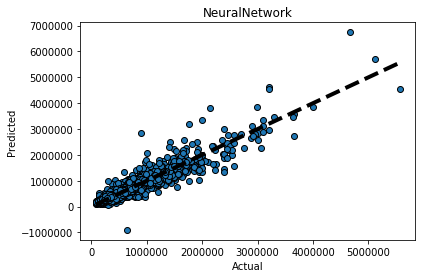

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("NeuralNetwork")
plt.show()


Above plot is visualization of results by NeuralNet model with Actual values on X axis and Predictions on Y axis. From the plot it seems that model worked really well through out the data unlike LinearRegress, LMS model where prediction error increased as Actual value of target variable increased

Text(0.5,1,'LinearRegress Model')

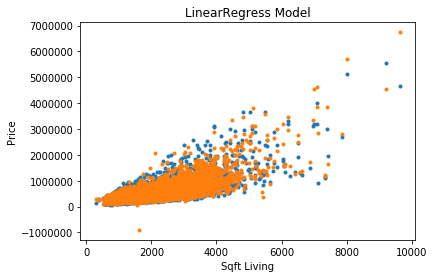

In [33]:
#Visualisation of results vs sqft living
#Blue points are actual price, Orange points are predicted points
sqft_test=[]
for i in range(len(X_test)):
    sqft_test.append(X_test[i][2])
plt.plot(sqft_test,y_test,'.',
        sqft_test,y_pred,'.')
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("LinearRegress Model")

Text(0.5,1,'NN model predictions')

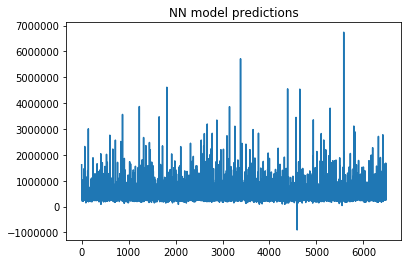

In [34]:
plt.plot(y_pred)
plt.title("NN model predictions")

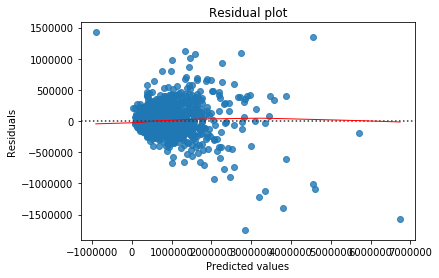

In [35]:
# Residual plot for LinearRegress model
sns.residplot(y_pred.flatten(), y_test.flatten(), lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

Above plot is Residual plot. Postive values of residual mean that prediction was too low and negative value of residual mean that prediction was too high. Residuals of NeuralNet model are slightly increasing as predicted value moves from small to large.

## Discussions about parameter/network structure choice

In this assignment i built 3 layer neural network. Input layer has 18 nodes because there are 18 features in my data. Output layer has 1 node. 

I thought of implementing just a three layer network model and wanted to compare with network model with more layers that will be created in Deeplearning models.

I tried for the best network structure by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing [[18,3,1],[18,7,1],[18,10,1], [18,13,1], [18,25,1]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. From the results of cross validation we can see that model [18,25,1] has appeared 4 times out of 5 folds. The rmse values returned for [18,25,1] in the final result are 152148.0665523644, 140406.31780688916, 162109.71130007162, 147048.98346659492. The other model [18,7,1] produced the rmse value of 164050.37771129367. 

The model with number of nodes in hidden layer 25 works better. From this we can see that with more number of nodes in hidden layer network works better. But this may not be true always because using more hidden units may overfit the data. This depends on the complexity of problem. 

Thus i used [18,25,1] as the final structure asit suited my data well. I have also tried changing the values of Lambda, optim(scg,steepest). Changing the Lambda values other than default 0.0 has dropped the accuracy of the model. This might be because we dont need any regularization in the model. Model doesnt overfit my data with Lambda 0.0. Even the model worked better with default optim value of scg compared steeper.

## Discussions about Prediction results

In this assignment we are performing regression analysis using Neural network which is non linear regression problem. In the assignment 1 we performed regression analysis using LinearRegress, LMS model which are linear regression problems. 

Neural network has outperfomred the results which are produced by LMS,LinearRegress model. On training the model using NeuralNet with optimum structure [18,25,1], model has produced a r squared value of 0.88 on test data, where as LMS model, LinearRegress model produced r squared value of 0.6857, 0.6818 respectively. There is great improvement in results by using neural network. 

Neural network learned better compared to linear regression problem due to large number of free parameters associated with it. We are free to choose hidden layers, hidden nodes that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used tanh as activation function. The gradient is updating the weights in each layer during back propagation which made network work so well. 

# Conclusions

In this Assignment i learned Neural networks and Deep neural networks works behind the algorithm. I learned what makes Neural networks so powerful for complex problems. I also learned implementing Croos validation from scratch with out using any libraries. I learned how important it is in selecting the parameters. I learned the differences in working of Neural networks for regression and Neural networks for classification, the step by step process followed by these networks and how these networks updates the weights in back propagation. I understood what makes NeuralNetwork class for classification from regression. 

I faced few challenges in understanding the concept of cross validation. While implementing the code for cross validation I faced many errors. It took me lot of effort in correctly implementing the cross validation with 3 loops inside it. I also faced challenges in writing implementation for NeuralNetLogReg class for classifiaction problem. 

In [36]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
adult_data=pd.read_csv("adult.csv")

# Dropping Unwanted Columns
adult_data=adult_data.drop(['education.num'],axis=1)
adult_data=adult_data.drop(['fnlwgt'],axis=1)
adult_data=adult_data.drop(['capital.gain'],axis=1)
adult_data=adult_data.drop(['capital.loss'],axis=1)
adult_data=adult_data.drop(['native.country'],axis=1)


# Converting target variable into binary classifer(0,1)
adult_data['income']=adult_data['income'].map({'<=50K': -1, '>50K': 1})

# Dataset has many cells with '?' as value. Below code is to drop the rows that has value '?'
adult_data = adult_data.replace({'?': np.nan}).dropna()
adult_data=adult_data.dropna()
adult_data = adult_data.reset_index(drop=True)

#Encoding categorical variables
adult_data['sex']=lb.fit_transform(adult_data['sex'])
adult_data['education']=lb.fit_transform(adult_data['education'])
adult_data['workclass']=lb.fit_transform(adult_data['workclass'])
adult_data['marital.status']=lb.fit_transform(adult_data['marital.status'])
adult_data['relationship']=lb.fit_transform(adult_data['relationship'])
adult_data['race']=lb.fit_transform(adult_data['race'])
adult_data['occupation']=lb.fit_transform(adult_data['occupation'])


In [37]:
y_adult=adult_data['income']
adult_data_lr=adult_data.drop(['income'],axis=1)
from sklearn import model_selection
from sklearn.metrics import r2_score
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(adult_data_lr, y_adult,test_size=0.20,random_state=42)

In [38]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        #T = self.add_ones(np.array(T).reshape(-1,1))
        #T=T.astype(int)
        #T[:,0]=T[:,1]
        #T[T[:,0]==1]=0
        #(T[:,1])[T[:,1]==0]=1
        #(T[:,0])[T[:,0]==-1]=1
        #T[T==-1]=0
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [40]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [41]:
nn = NeuralNetLogReg([9,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


In [42]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [43]:
y_test=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test, l))
print('Accuracy:', accuracy_score(y_test, l))

F1 score: 0.5960479429867185
Accuracy: 0.7970377604166666


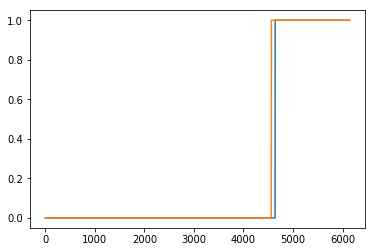

In [44]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(l))

## Crossvalidation to discover best model

In [54]:
T = add_ones(np.array(y_adult).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [56]:

def split(s, num):
    avg = len(s) / float(num)
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

finalAcclist=[]
bestParamlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X, 5)
    partitionedT = split(T, 5)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        records=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #records.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            records.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("records",records)
        print("params",params)
        #print(rmselist)
        print(records)
        print(params)
        bestParam = params[np.argmax(records)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        finalAcc = f1_score(Ttest1, finalPred)
        finalAcclist.append(finalAcc)
        bestParamlist.append(bestParam)

    return finalAcclist,bestParamlist

In [57]:
models = [[9,10,2], [9,7,2],[9,9,2], [9,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(adult_data_lr), T, models))

test 0
val 0
val 1


C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


[0.568639798488665, 0.5414251619502216, 0.5535499398315283, 0.5724336424688199]
[[9, 10, 2], [9, 7, 2], [9, 9, 2], [9, 12, 2]]
0.5724336424688199
[9, 12, 2]
val 2
[0.5732292917166867, 0.567128946591915, 0.5695364238410596, 0.5723885155772755]
[[9, 10, 2], [9, 7, 2], [9, 9, 2], [9, 12, 2]]
0.5732292917166867
[9, 10, 2]
val 3
[0.5600268276324614, 0.46577211735274054, 0.5473684210526316, 0.5417163289630512]
[[9, 10, 2], [9, 7, 2], [9, 9, 2], [9, 12, 2]]
0.5600268276324614
[9, 10, 2]
val 4
[0.5861533685190935, 0.5860493451111788, 0.5697530864197531, 0.5976722239698017]
[[9, 10, 2], [9, 7, 2], [9, 9, 2], [9, 12, 2]]
0.5976722239698017
[9, 12, 2]
records [0.5724336424688199, 0.5732292917166867, 0.5600268276324614, 0.5976722239698017]
params [[9, 12, 2], [9, 10, 2], [9, 10, 2], [9, 12, 2]]
[0.5724336424688199, 0.5732292917166867, 0.5600268276324614, 0.5976722239698017]
[[9, 12, 2], [9, 10, 2], [9, 10, 2], [9, 12, 2]]
[9, 12, 2]
test 1
val 0
[0.7465076660988075, 0.704, 0.753366286006477, 0.753

In [58]:
print(bestAccuracy)
print(bestParam)

[0.481000245158127, 0.5644555694618273, 0.5720430107526882, 0.46536007292616227, 0.6002490660024907]
[[9, 12, 2], [9, 9, 2], [9, 12, 2], [9, 10, 2], [9, 12, 2]]


#### Training and Testing with optimum parameters

In [59]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [60]:
# Training and Testing with optimum parameters

nn = NeuralNetLogReg([9,12,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
C:\Users\jayac\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


In [61]:
y_pred1=l
y_test1=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test1, y_pred1))
print('Accuracy:', accuracy_score(y_test1, y_pred1))

F1 score: 0.5972271596160682
Accuracy: 0.8155924479166666
